# WATERMARK DESTRUCTIVE ATTACKS


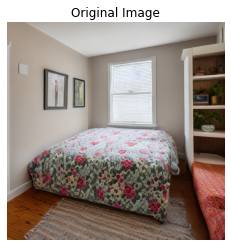

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise
import numpy as np
from bm3d import bm3d_rgb

image_path = 'image.png'  # Change this to your image filename
image = Image.open(image_path)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

## GAUSSIAN BLUR ATTACK

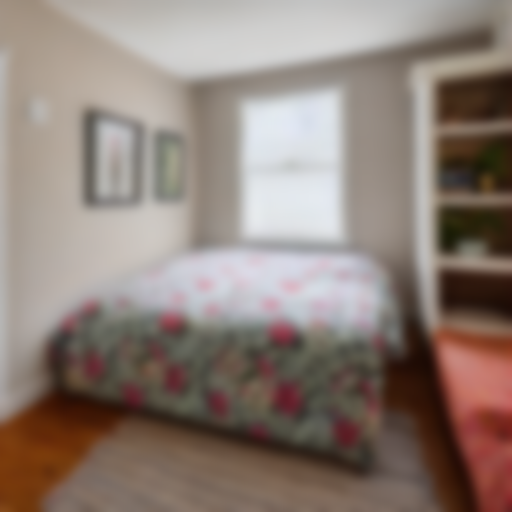

In [2]:
# Apply Gaussian Blur filter
blurred_image = image.filter(ImageFilter.GaussianBlur(5))  # Increase the value for a stronger blur effect

# Display the blurred image
display(blurred_image)

In [3]:
blurred_image.save("blurred_image.png")

Watermark performance: 0.167
Quality Degradation: 0.722
Overall: 0.551

In [ ]:
#plot a curve

## ROTATION ATTACK

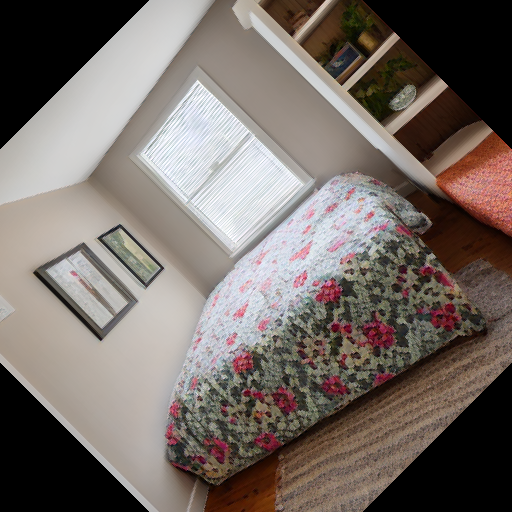

In [4]:
# Rotate the image by 45 degrees
rotated_image = image.rotate(45)

# Display the rotated image
display(rotated_image)

In [5]:
rotated_image.save("rotated_image.png")

Watermark performance: 0.083
Quality Degradation: 0.995
Overall: 0.736

## EXPOSURE ATTACK

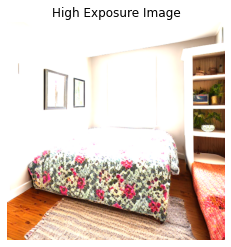

In [6]:
# Increase exposure (brightness)
exposure_factor = 2.0  # Increase this value for more exposure (brightness)
enhancer = ImageEnhance.Brightness(image)
high_exposure_image = enhancer.enhance(exposure_factor)

# Display the high exposure image
plt.imshow(high_exposure_image)
plt.title('High Exposure Image')
plt.axis('off')
plt.show()

In [7]:
high_exposure_image.save("high_exposure_image.png")

Watermark performance: 1.000
Quality Degradation: 0.541
Overall: 1.036

## CONTRAST ATTACK

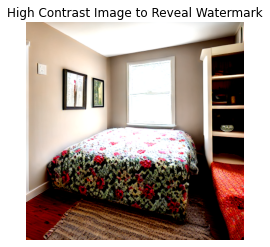

In [8]:
# Increase contrast
contrast_factor = 2.0
enhancer = ImageEnhance.Contrast(image)
high_contrast_image = enhancer.enhance(contrast_factor)

plt.imshow(high_contrast_image)
plt.title('High Contrast Image to Reveal Watermark')
plt.axis('off')
plt.show()

In [9]:
high_contrast_image.save("high_contrast_image.png")

Watermark performance: 0.958
Quality Degradation: 0.379
Overall: 0.997

## BRIGHTNESS ATTACK

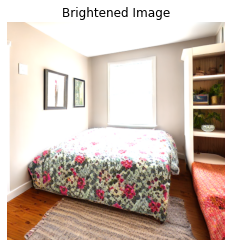

In [10]:
brightness_factor = 1.5 
enhancer = ImageEnhance.Brightness(image)
bright_image = enhancer.enhance(brightness_factor)

# Display the brightened image
plt.imshow(bright_image)
plt.title('Brightened Image')
plt.axis('off')
plt.show()

In [11]:
bright_image.save("bright_image.png")

Watermark performance: 1.000
Quality Degradation: 0.358
Overall: 1.016

## CROP ATTACK

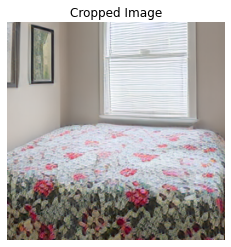

In [12]:
left = image.width // 4
upper = image.height // 4
right = image.width * 3 // 4
lower = image.height * 3 // 4
cropped_image = image.crop((left, upper, right, lower))

# Display the cropped image
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()

In [13]:
cropped_image.save("cropped_image.png")

## JPEG Attack

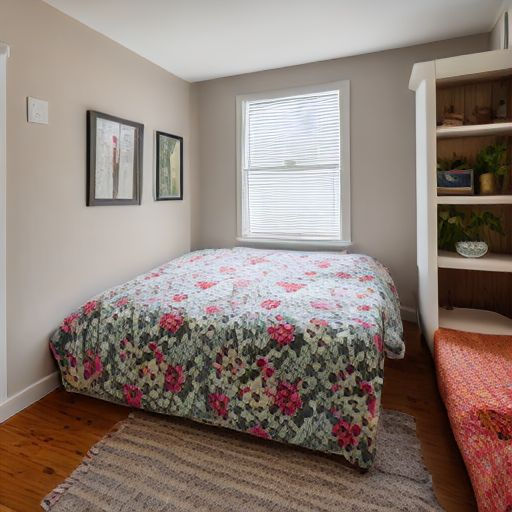

In [14]:
image.save('jpeg_image', "JPEG", quality=80)
jpeg_image = Image.open('jpeg_image')
jpeg_image

Watermark performance: 0.875
Quality Degradation: 0.122
Overall: 0.939

## Gaussian Noise Attack

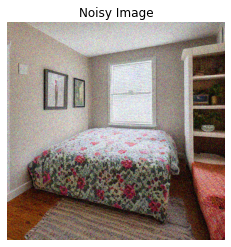

In [15]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

mean = 0
std_dev = 25
gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
noisy_image = image + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
cv2.imwrite("noisy_image.png", noisy_image)
plt.title("Noisy Image")
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Watermark performance: 0.542
Quality Degradation: 0.741
Overall: 0.855

## BM3D Attack

In [ ]:
img = Image.open(image_path).convert('RGB')
y_est = bm3d_rgb(np.array(img) / 255, 0.1)  # use standard deviation as 0.1, 0.05 also works
plt.imsave('bm3d_img.png', np.clip(y_est, 0, 1), cmap='gray', vmin=0, vmax=1)
bm3d_image = Image.open('bm3d_img.png')
bm3d_image


Watermark performance: 0.750
Quality Degradation: 0.236
Overall: 0.883

In [2]:
import sys
import torch
import os
import glob
import numpy as np

from attack import ReSDPipeline
from watermarker import InvisibleWatermarker

from utils import eval_psnr_ssim_msssim, bytearray_to_bits
# from watermarker import InvisibleWatermarker
# from wmattacker import DiffWMAttacker, VAEWMAttacker, JPEGAttacker

ImportError: cannot import name 'InvisibleWatermarker' from 'watermarker' (/home/apurohit/Capstone/watermarker.py)

In [ ]:
wm_text = 'test'
device = 'cuda:0'
ori_path = 'examples/ori_imgs'
output_path = 'examples/wm_imgs/'
print_width = 50

In [ ]:
os.makedirs(output_path, exist_ok=True)
ori_img_paths = glob.glob(os.path.join(ori_path, '*.*'))
ori_img_paths = sorted([path for path in ori_img_paths if path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
print(ori_img_paths)

In [ ]:
wmarkers = {
    'DwtDct': InvisibleWatermarker(wm_text, 'dwtDct'),
    'DwtDctSvd': InvisibleWatermarker(wm_text, 'dwtDctSvd'),
    'RivaGAN': InvisibleWatermarker(wm_text, 'rivaGan'),
}

In [ ]:
pipe = ReSDPipeline.from_pretrained("stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16, revision="fp16")
pipe.set_progress_bar_config(disable=True)
pipe.to(device)
print('Finished loading model')

In [ ]:
attackers = {
    'diff_attacker_60': DiffWMAttacker(pipe, batch_size=5, noise_step=60, captions={})
}

In [ ]:
def add_watermark(wmarker_name, wmarker):
    print('*' * print_width)
    print(f'Watermarking with {wmarker_name}')
    os.makedirs(os.path.join(output_path, wmarker_name + '/noatt'), exist_ok=True)
    for ori_img_path in ori_img_paths:
        img_name = os.path.basename(ori_img_path)
        wmarker.encode(ori_img_path, os.path.join(output_path, wmarker_name + '/noatt', img_name))
    # wmarker.encode('images/image.png', 'results/')

for wmarker_name, wmarker in wmarkers.items():
    add_watermark(wmarker_name, wmarker)
print('Finished watermarking')

In [ ]:
for wmarker_name, wmarker in wmarkers.items():
    for attacker_name, attacker in attackers.items():
        print('*' * print_width)
        print(f'Attacking {wmarker_name} with {attacker_name}')
        wm_img_paths = []
        att_img_paths = []
        os.makedirs(os.path.join(output_path, wmarker_name, attacker_name), exist_ok=True)
        for ori_img_path in ori_img_paths:
            img_name = os.path.basename(ori_img_path)
            wm_img_paths.append(os.path.join(output_path, wmarker_name + '/noatt', img_name))
            att_img_paths.append(os.path.join(output_path, wmarker_name, attacker_name, img_name))
        attackers[attacker_name].attack(wm_img_paths, att_img_paths)

print('Finished attacking')

In [ ]:
wm_results = {}
for wmarker_name, wmarker in wmarkers.items():
    print('*' * print_width)
    print(f'Watermark: {wmarker_name}')
    wm_successes = []
    wm_psnr_list = []
    wm_ssim_list = []
    wm_msssim_list = []
    for ori_img_path in ori_img_paths:
        img_name = os.path.basename(ori_img_path)
        wm_img_path = os.path.join(output_path, wmarker_name+'/noatt', img_name)
        wm_psnr, wm_ssim, wm_msssim = eval_psnr_ssim_msssim(ori_img_path, wm_img_path)
        wm_psnr_list.append(wm_psnr)
        wm_ssim_list.append(wm_ssim)
        wm_msssim_list.append(wm_msssim)
    wm_results[wmarker_name] = {}
    wm_results[wmarker_name]['wm_psnr'] = np.array(wm_psnr_list).mean()
    wm_results[wmarker_name]['wm_ssim'] = np.array(wm_ssim_list).mean()
    wm_results[wmarker_name]['wm_msssim'] = np.array(wm_msssim_list).mean()

print('Finished evaluating watermarking')

In [ ]:
detect_wm_results = {}
for wmarker_name, wmarker in wmarkers.items():
    print('*' * print_width)
    print(f'Watermark: {wmarker_name}')
    bit_accs = []
    wm_successes = []
    for ori_img_path in ori_img_paths:
        img_name = os.path.basename(ori_img_path)
        wm_img_path = os.path.join(output_path, wmarker_name+'/noatt', img_name)
        wm_text = wmarkers[wmarker_name].decode(wm_img_path)
        try:
            if type(wm_text) == bytes:
                a = bytearray_to_bits('test'.encode('utf-8'))
                b = bytearray_to_bits(wm_text)
            elif type(wm_text) == str:
                a = bytearray_to_bits('test'.encode('utf-8'))
                b = bytearray_to_bits(wm_text.encode('utf-8'))
            bit_acc = (np.array(a) ==  np.array(b)).mean()
            bit_accs.append(bit_acc)
            if bit_acc > 24/32:
                wm_successes.append(img_name)
        except:
            print('#' * print_width)
            print(f'failed to decode {wm_text}', type(wm_text), len(wm_text))
            pass
    detect_wm_results[wmarker_name] = {}
    detect_wm_results[wmarker_name]['bit_acc'] = np.array(bit_accs).mean()
    detect_wm_results[wmarker_name]['wm_success'] = len(wm_successes) / len(ori_img_paths)
print('Finished evaluating watermarking')

In [ ]:
detect_att_results = {}
for wmarker_name, wmarker in wmarkers.items():
    print('*' * print_width)
    print(f'Watermark: {wmarker_name}')
    detect_att_results[wmarker_name] = {}
    for attacker_name, attacker in attackers.items():
        print(f'Attacker: {attacker_name}')
        bit_accs = []
        wm_successes = []
        for ori_img_path in ori_img_paths:
            img_name = os.path.basename(ori_img_path)
            att_img_path = os.path.join(output_path, wmarker_name, attacker_name, img_name)
            att_text = wmarkers[wmarker_name].decode(att_img_path)
            try:
                if type(att_text) == bytes:
                    a = bytearray_to_bits('test'.encode('utf-8'))
                    b = bytearray_to_bits(att_text)
                elif type(att_text) == str:
                    a = bytearray_to_bits('test'.encode('utf-8'))
                    b = bytearray_to_bits(att_text.encode('utf-8'))
                bit_acc = (np.array(a) ==  np.array(b)).mean()
                bit_accs.append(bit_acc)
                if bit_acc > 24/32:
                    wm_successes.append(img_name)
            except:
                print('#' * print_width)
                print(f'failed to decode {wm_text}', type(wm_text), len(wm_text))
                pass
        detect_att_results[wmarker_name][attacker_name] = {}
        detect_att_results[wmarker_name][attacker_name]['bit_acc'] = np.array(bit_accs).mean()
        detect_att_results[wmarker_name][attacker_name]['wm_success'] = len(wm_successes) / len(ori_img_paths)


In [ ]:
img_id = 'image.png'
Image(filename='examples/ori_imgs/'+img_id) # original image

In [ ]:
Image(filename='examples/wm_imgs/DwtDct/noatt/'+img_id) # watermarked image

In [ ]:
Image(filename='examples/wm_imgs/DwtDct/diff_attacker_60/'+img_id) # diffusion attacker